# Support Vector Machine

## Kegunaan SVM:
- Klasifikasi
- Regresi (Prediksi time series, dll)
- Outlier Detection
- Clustering

## Perbandingan SVM dan Neural Networks
![alt text](https://image.slidesharecdn.com/mscpresentation-140722065852-phpapp01/95/msc-presentation-bioinformatics-7-638.jpg?cb=1406012610 "Logo Title Text 1")

- SVM cocok untuk data sets yang sedikit
- Algoritma lain seperti random forests, deep neural networks memerlukan lebih banyak data tapi algoritma tersebut menghasilkan model yang lebih baik
- Untuk memilih penggunaan classifier bergantung pada dataset dan kompleksitas dari permasalahannya

## Apa itu Support Vector Machine?
SVM merupakan algoritma supervised machine learning yang dapat digunakan untuk klasifikasi ataupun regresi tetapi biasanya digunakan untuk klasifikasi.

SVM dapat diberikan data dengan 2 atau lebih label. SVM bertindak sebagai discriminative classifier, secara umum didefinisikan dengan hyperlane yang optimal untuk memisahkan antar class.

## Apa itu Support Vector?
![alt text](https://www.dtreg.com/uploaded/pageimg/SvmMargin2.jpg "Logo Title Text 1")

Support vector merupakan data points yang terletak paling dekat dengan hyperplane, jika support vector dilepas maka akan mengubah posisi dari hyperplane. Oleh karena itu, support vector merupakan elements yang penting dari sebuah data set, support vectorlah yang membantu kita membangun SVM.

Semakin besar margin yang dibentuk akan semakin baik, sehingga yang perlu kita lakukan adalah melakukan optimasi untuk mendapatkan hyperplane dengan margin terbesar.
## Apa itu hyperplane?
![alt text](http://slideplayer.com/slide/1579281/5/images/32/Hyperplanes+as+decision+surfaces.jpg "Logo Title Text 1")

Hyperplane merupakan sub-ruang dari sebuah dimensi yang dimensinya kurang dari dimensi ruang aslinya. Pada SVM hyperplane dari sebuah dimensi n memiliki dimensi n-1.

## Linear vs Non-Linear Classification?

Jika data set dipisahkan secara linear maka untuk N class dengan M fitur, kita dapat memetakannya sebagai kombinasi linear (misal y =mx + b) atau dengam hyperplane multi-dimensi (misal y= x + z + b + q). Berapapun jumlah dimensi/ fitur dari data set kita akan tetap bisa untuk menggambarkan pemetaannya menggunakan sebuah fungsi linear.

Jika kita kurang beruntung memiliki dataset yang tidak terpisah secara linear, contohnya saat ada sebuah quadratic mapping. Untungnya SVM  dapat melakukan klasifikasi non-linear menggunakan suatu hal yan dikenal dengan kernel trick. 

![alt text](https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAuSAAAAJDlhYzcwMzhlLTA0MjYtNDEyYS1hMWM4LTE3Zjk5NDlhNzVkMQ.png "Logo Title Text 1")

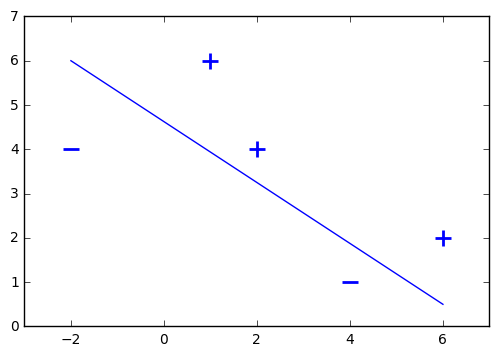

In [15]:
#To help us perform math operations
import numpy as np
#to plot our data and model visually
from matplotlib import pyplot as plt
%matplotlib inline

#Step 1 - Define our data

#Input data - Of the form [X value, Y value, Bias term]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

#Associated output labels - First 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])

#lets plot these examples on a 2D graph!
#for each example
for d, sample in enumerate(X):
    # Plot the negative samples (the first 2)
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples (the last 3)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
#we'll two points and draw the line between them (naive guess)
plt.plot([-2,6],[6,0.5])

# Mendifinisikan lost function (minimize) dan objective function (optimize)

## Lost Function

Disini kita aka menggunakan Hinge Loss. Hinge oss merupakan lost function yang digunakan untuk "maximum-margin" classification, Umumnya digunakan untuk SVM

![alt text](http://i.imgur.com/OzCwzyN.png "Logo Title Text 1")

c merupakan lost function, x merupakan sample, y merupakan  label (jawaban) yang benar, f(x) merupakan label prediksi

![alt text](http://i.imgur.com/FZ7JcG3.png "Logo Title Text 1")


## Objective Function

![alt text](https://i.imgur.com/BVg0oLp.png "Logo Title Text 1")

tujuan SVM terdiri dari dua istilah. yang pertama adalah regularizer,regularizer adalah jantungnya SVM, yang kedua adalah kerugiannya. Regulatorer menyeimbangkan antara maksimisasi dan kerugian margin. jika ingin menemukan permukaan keputusan yang maksimal dari titik data manapun.
![alt text](https://i.imgur.com/Lon8E43.png "Logo Title Text 1")


Kondisi klasifikasi

![alt text](https://i.imgur.com/HeJOxIb.png "Logo Title Text 1")

Perbarui aturan untuk weight (misclassified)

![alt text](https://i.imgur.com/MA7kc3R.png "Logo Title Text 1")

termasuk tingkat  η dan regularizer λ Tingkat adalah panjang langkah yang dibuat algoritma pada gradien pada kurva kesalahan.
- Tingkat terlalu tinggi? Algoritma mungkin melampaui titik optimal.
- Tingkat terlalu rendah? Bisa memakan waktu terlalu lama untuk bertemu. Atau tidak pernah konvergen

Regulatorer mengontrol trade off antara mencapai kesalahan pelatihan rendah dan kesalahan pengujian rendah yaitu kemampuan untuk menggeneralisasi pengklasifikasi Anda ke data yang tidak terlihat. Sebagai parameter pengatur yang kita pilih 1/epoch, jadi parameter ini akan menurun, seiring bertambahnya jumlah zaman.
- Regularizer terlalu tinggi? overfit (kesalahan pengujian besar)
- Regularizer terlalu rendah? kurang ajar (kesalahan pelatihan besar)

Rumus update untuk weight (diklasifikasikan dengan benar)

![alt text](https://i.imgur.com/QKdyb9C.png "Logo Title Text 1")

In [16]:
#lets perform stochastic gradient descent to learn the seperating hyperplane between both classes

def svm_sgd_plot(X, Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    #The learning rate
    eta = 1
    #how many iterations to train for
    epochs = 100000
    #store misclassifications so we can plot how they change over time
    errors = []

    #training part, gradient descent part
    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            #misclassification
            if (Y[i]*np.dot(X[i], w)) < 1:
                #misclassified update for ours weights
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                #correct classification, update our weights
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
        

    #lets plot the rate of classification errors during training for our SVM
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

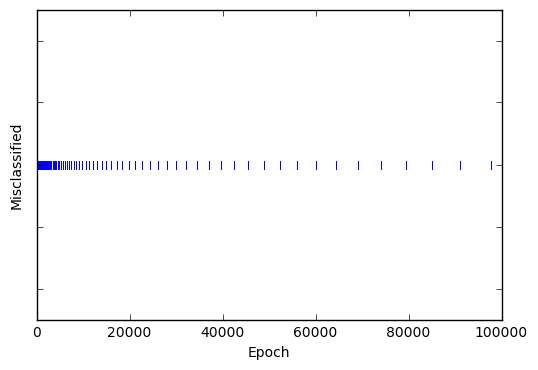

In [17]:
w = svm_sgd_plot(X,y)

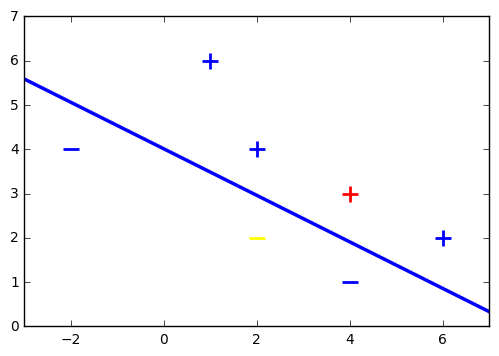

In [18]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='red')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')